# Logistic Regression: Outline

Some modules that we will cover before launching into Logistic Regression heads on. 

Modules:
- Visualization
    - Using matplotlib
    - Using seaborn
- Randomization
    - Using numpy.random
- Panda 
    - Using dataframes

Quick test:
- We want to generate n (say 100) points in 2D randomly in a bounding box.
- We want to generate n points in 2D colored in _one of two colors_. 

Let's tackle the first of the above tasks.


## Randomization

First, the imports. Declare matplotlib inline so that the plots show in this very notebook.

In [43]:
%matplotlib inline
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
a = random.rand(2, 3)
print a

[[ 0.45926772  0.59573883  0.41309509]
 [ 0.80794738  0.01934307  0.05121573]]


In [45]:
b = random.randn(2, 3)
print b

[[ 0.07465884 -1.49060033 -0.15150364]
 [ 0.38542729 -0.76019351 -0.17416547]]


In [46]:
coordstest = np.vstack([np.random.uniform(150, 220, 20), 
                        np.random.uniform(150, 220, 20)]).T

In [47]:
coordstest

array([[ 214.83320779,  204.5623656 ],
       [ 199.13417269,  173.32750854],
       [ 197.21948022,  160.94429629],
       [ 205.09461993,  175.84857786],
       [ 169.73394644,  165.94826058],
       [ 203.34150186,  202.45414548],
       [ 194.45865979,  173.76158205],
       [ 153.17551863,  178.48530574],
       [ 189.45908951,  173.74628407],
       [ 207.07091176,  189.0628414 ],
       [ 157.50551955,  196.485188  ],
       [ 211.43990405,  217.67853912],
       [ 159.69386982,  190.80260274],
       [ 184.28568069,  216.9667582 ],
       [ 193.96820133,  209.8131571 ],
       [ 206.863752  ,  197.57100913],
       [ 153.21635988,  211.90753771],
       [ 181.40828854,  182.336633  ],
       [ 184.47894857,  212.05087003],
       [ 216.5004355 ,  153.36452513]])

In [59]:
individuals = (np.arange(0,200).reshape(-1,1)*np.ones(10).reshape(1,-1)).flatten()
individuals = pd.Series(individuals)
print len(individuals)
print type(individuals)

2000
<class 'pandas.core.series.Series'>


In [49]:
corr = 0.95 
means = [200, 180]
stds = [10, 10]
covs = [[stds[0]**2, stds[0]*stds[1]*corr],[stds[0]*stds[1]*corr, stds[1]**2]]

In [50]:
coords = np.vstack([np.random.multivariate_normal(coordstest[i,:], covs, 200) 
                         for i in range(10)])

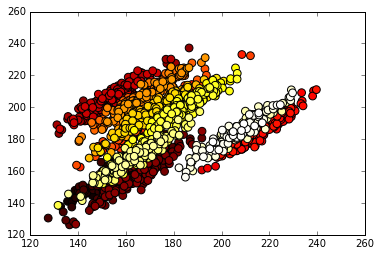

In [61]:
plt.scatter(allCoords['x'], allCoords['y'], c = individuals, 
      s = 60, cmap = 'hot')

Now, we are going to try generating N (for instance, 100) random 2D points, and color them as in red and green, 
then visualize them using matplotlib.

To show the varying effects, perform the following changes. 

Change
- N
- rand to randn 
- colors_used
- s, i.e. size of the points
- alpha, the shading of the colored points. 

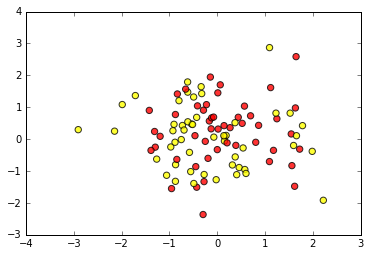

In [92]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)
colors = np.random.rand(N)
colors_used = [2, 3]
colors_used = ['yellow', 'red']
colors = colors_used*(N/len(colors_used))
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, s = 40, c = colors, alpha = 0.8)
plt.show()

## Centering the points
The points from the two classes above seem to be overly mixed. In order to generate samples that are perhaps linearly separable, we will still pick from the normal distribution, but with different means $\mu_1, \mu_2$ and std. deviations $\sigma_1, \sigma_2$.

### Quiz Question:
Given a random variable $Z$ drawn from the *standard normal* distribution (i.e. $Z \sim N(0,1)$), how do we generate a variable that is drawn from $N(\mu, \sigma)$?

#### Hint: 
If $Z \sim N(0, 1)$, then 
* $Z + \mu \sim N(\mu, 1)$.
* $\sigma Z \sim N(0, \sigma)$.



### Centering and coloring the points.
We will keep two colors for now (say, red and yellow), variables $n_r$ and $n_y$ for the number of red and yellow points that we want to keep in our dataset. 

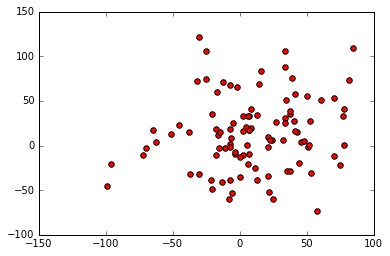

In [99]:
num_pts = [50, 50]
mu_vals = [10, 5]
sigma_vals = [40, 10]

x_r = sigma_vals[0]*np.random.randn(N) + mu_vals[0]
y_r = sigma_vals[0]*np.random.randn(N) + mu_vals[0]

plt.scatter(x_r, y_r, s = 30, c = ['red'])

In [98]:
2.5 * np.random.randn( 4, 2) + 3

array([[ 1.41348946,  5.07437648],
       [ 6.96296119,  2.00851778],
       [ 1.92879574,  7.66037049],
       [ 5.8559947 ,  2.38430685]])